In [1]:
import numpy as np 
from ecg_base import generateBaseEcg 

In [14]:
A = [[-0.313,	-4.680,	1.057,	-0.500,	0.345],
    [0.373	,4.726	,0.690	,0.228	,-0.223]]
T = [[282.660,	87.180,	30.640,	11.120,	177.252],
     [264.160,	88.000,	15.400,	1.000,	248.027]]
S = [[	43.672,	19.990,	14.110,	18.060,	92.944],
        [50.571,	20.580,	14.110,	5.676,	46.880]]
Lengths = [300,88,48,77,429]
C = [[0.011,-0.04,-0.27,0.017,-0.001],
     [0,0,0,0,0]]


In [15]:
signal = generateBaseEcg(Lengths,A,T,S,C)

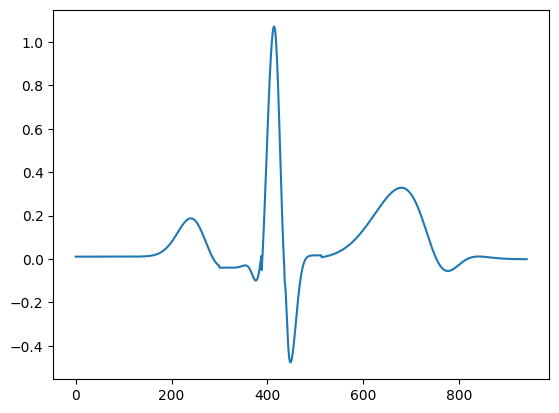

In [17]:
import matplotlib.pyplot as plt 
plt.plot(signal)

In [43]:
A1 = [ -35.820,	17.820,	0.691,	40.690,	-0.224,	-0.313,	-4.680,	1.057,	-0.500,	0.345]
A2 = [35.734	,-7.800	,1.057	,-1.100	,0.345	,0.373	,4.726	,0.690	,0.228	,-0.223]
T1 = [80.355,	31.446,	15.401,	19.430,	248.020,	282.660,	87.180,	30.640,	11.120,	177.252]
T2 = [80.360,	31.445,	30.644,	19.380,	177.260,	264.160,	88.000,	15.400,	1.000,	248.027]
Si1 = [65.943,	20.005,	14.110,	12.140,	46.880,	43.672,	19.990,	14.110,	18.060,	92.944]
Si2 = [65.782,	19.957,	14.110,	12.190,	92.949,	50.571,	20.580,	14.110,	5.676,	46.880]
T = [300,88,48,77,429]
C = [0,0,0,0,0]

time = np.linspace(0,2000,256)

x = []

for t in time:
    new_x = 0
    for i in range(5):
        new_x += A1[i]*np.exp(-(((t-T1[i])**2)/(Si1[i]**2)))
    for i in range(5):
        new_x += A2[i]*np.exp(-(((t-T2[i])**2)/(Si2[i]**2)))
    x.append(new_x)

In [79]:
p = []

time = np.linspace(0,300,300)
for t in time :
    i = 5
    new_x = 0
    new_x+= A1[i]*np.exp(-(((t-T1[i])**2)/(Si1[i]**2)))
    new_x+= A2[i]*np.exp(-(((t-T2[i])**2)/(Si2[i]**2)))
    p.append(new_x)
time = np.linspace(0,88,88)
for t in time :
    i = 6
    new_x = 0
    new_x+= A1[i]*np.exp(-(((t-T1[i])**2)/(Si1[i]**2)))
    new_x+= A2[i]*np.exp(-(((t-T2[i])**2)/(Si2[i]**2)))
    p.append(new_x)
time = np.linspace(0,48,48)
for t in time :
    i = 7
    new_x = 0
    new_x+= A1[i]*np.exp(-(((t-T1[i])**2)/(Si1[i]**2)))
    new_x+= A2[i]*np.exp(-(((t-T2[i])**2)/(Si2[i]**2)))
    p.append(new_x)
time = np.linspace(0,77,77)
for t in time :
    i = 8
    new_x = 0
    new_x+= A1[i]*np.exp(-(((t-T1[i])**2)/(Si1[i]**2)))
    new_x+= A2[i]*np.exp(-(((t-T2[i])**2)/(Si2[i]**2)))
    p.append(new_x)

time = np.linspace(0,429)
for t in time :
    i = 9
    new_x = 0
    new_x+= A1[i]*np.exp(-(((t-T1[i])**2)/(Si1[i]**2)))
    new_x+= A2[i]*np.exp(-(((t-T2[i])**2)/(Si2[i]**2)))
    p.append(new_x)

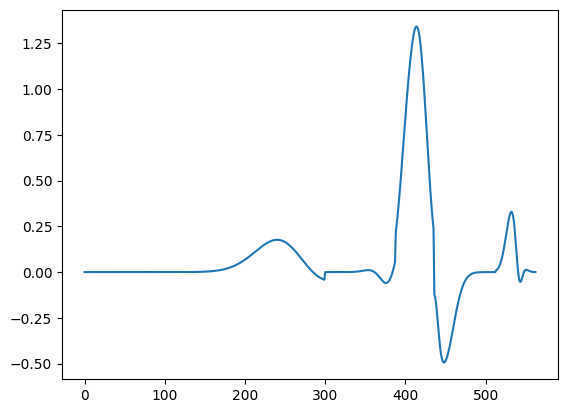

In [80]:
plt.plot(p)

In [86]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

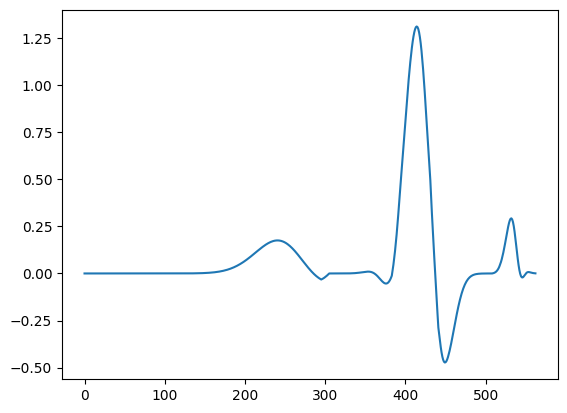

In [94]:
plt.plot(smooth(p,10))